In [132]:
import warnings
warnings.filterwarnings('ignore')

In [133]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
import cvxpy as cp
import numpy as np
import plotly.graph_objects as go
import ast
from scipy.optimize import minimize

---
# **Risky** Asset Data

In [134]:
def get_historical_data(tickers, start_date, end_date):
    data = {}  # to store all the data

    # Looping through all the companies to get/download the desired data
    for ticker in tickers:
        # Fetching the company name in proper short format
        company_name = yf.Ticker(ticker).info['longName'].split()[0].strip(',')
        stock_data = yf.download(ticker, start=start_date, end=end_date)  # Downloading the data
        data[company_name] = stock_data['Close']

    # Converting to a pandas dataframe
    data = pd.DataFrame(data)

    return data

tickers = ['MSFT', 'JPM', 'WMT', 'CRM', 'MCD', 'AMZN', 'NVDA', 'CAT', 'KO', 'GOOGL']

time_period = 90  # 3 months = 90 days
end_date = datetime.today().strftime('%Y-%m-%d')  # Current timestamp
start_date = (datetime.today() - timedelta(days=time_period)).strftime('%Y-%m-%d')  # Start date will be 3 months before the current time stamp

risky_asset_data = get_historical_data(tickers, start_date, end_date)

risky_asset_data.rename(columns={
    'Amazon.com': 'Amazon',
    'Alphabet': 'Google',
    'The': 'CocaCola'
}, inplace=True)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [135]:
risky_asset_data

,Microsoft,JPMorgan,Walmart,Salesforce,McDonald's,Amazon,NVIDIA,Caterpillar,CocaCola,Google
Date,,,,,,,,,,
2023-11-24,377.429993,153.539993,156.059998,224.380005,282.540009,146.740005,477.760010,247.360001,58.570000,136.690002
2023-11-27,378.609985,153.190002,156.770004,224.789993,281.839996,147.729996,482.420013,247.389999,58.459999,136.410004
2023-11-28,382.700012,153.539993,158.639999,224.919998,282.089996,147.029999,478.209991,247.500000,58.580002,137.199997
2023-11-29,378.850006,154.320007,156.080002,230.350006,280.380005,146.320007,481.399994,249.449997,58.230000,134.990005
2023-11-30,378.910004,156.080002,155.690002,251.899994,281.839996,146.089996,467.700012,250.720001,58.439999,132.529999
2023-12-01,374.510010,156.839996,154.339996,260.000000,285.959991,147.029999,467.649994,256.760010,58.639999,131.860001
2023-12-04,369.140015,157.990005,154.300003,250.660004,286.130005,144.839996,455.100006,254.750000,58.570000,129.270004
2023-12-05,372.519989,157.970001,155.729996,251.020004,286.540009,146.880005,465.660004,255.190002,58.660000,130.990005
2023-12-06,368.799988,156.309998,154.039993,249.130005,286.859985,144.520004,455.029999,255.970001,58.599998,130.020004


In [136]:
risky_asset_returns = risky_asset_data.pct_change().dropna() * 100

In [137]:
risky_asset_returns

,Microsoft,JPMorgan,Walmart,Salesforce,McDonald's,Amazon,NVIDIA,Caterpillar,CocaCola,Google
Date,,,,,,,,,,
2023-11-27,0.312639,-0.227948,0.454958,0.182721,-0.247757,0.674656,0.975386,0.012128,-0.187811,-0.204842
2023-11-28,1.080274,0.228468,1.192827,0.057834,0.088703,-0.473835,-0.872688,0.044464,0.205273,0.579131
2023-11-29,-1.006011,0.508020,-1.613715,2.414195,-0.606186,-0.482889,0.667071,0.787878,-0.597477,-1.610781
2023-11-30,0.015837,1.140484,-0.249871,9.355323,0.520719,-0.157197,-2.845862,0.509122,0.360637,-1.822362
2023-12-01,-1.161224,0.486926,-0.867112,3.215564,1.461821,0.643441,-0.010695,2.409065,0.342233,-0.505545
2023-12-04,-1.433872,0.733237,-0.025912,-3.592306,0.059454,-1.489494,-2.683628,-0.782836,-0.119372,-1.964202
2023-12-05,0.915635,-0.012662,0.926761,0.143621,0.143293,1.408457,2.320369,0.172719,0.153663,1.330549
2023-12-06,-0.998604,-1.050835,-1.085213,-0.752928,0.111669,-1.606754,-2.282782,0.305654,-0.102287,-0.740515
2023-12-07,0.582978,0.307079,-1.025699,-0.112391,-0.024394,1.632992,2.402038,0.562567,0.238913,5.314558


---

---
# **Risk Free** Asset Data

## We choose Indian Railways Bond as our risk free asset, and it has an yield 4.24%

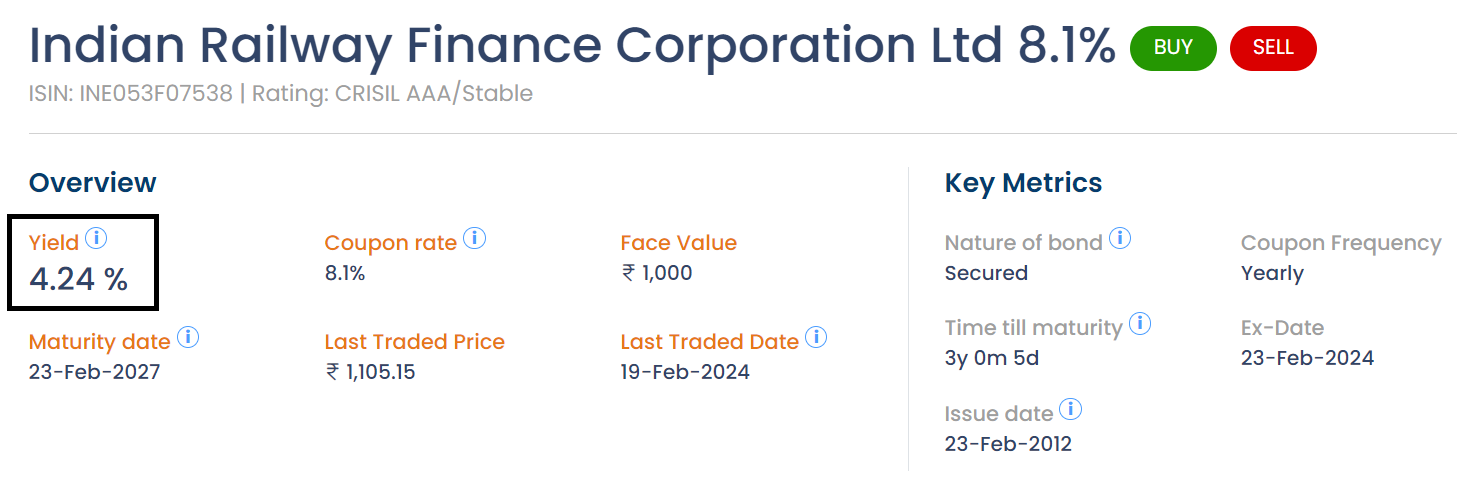

In [138]:
risk_free_rate = 4.24 / 100 # This is our yield for risk free government bond

___

---
# **Visualizations**

In [139]:
px.imshow(risky_asset_returns, height=800, width=1200)

In [140]:
viz_data = risky_asset_returns.reset_index()
melted_data = viz_data.melt(id_vars='Date', var_name='Company', value_name='Return')

fig = px.line(melted_data, x='Date', y='Return', color='Company', title='Company Returns Over Time')
fig.show()

___

---
# **CAPM** Formula to calculate return of each risky assets

In [141]:
# We need market data
market_ticker = "^NSEBANK"

end_date = datetime.today().strftime('%Y-%m-%d')  # End date is today
start_date = (datetime.today() - timedelta(days=90)).strftime('%Y-%m-%d')  # Start date is 90 days ago

market_data = yf.download(market_ticker, start=start_date, end=end_date)['Close']

[*********************100%%**********************]  1 of 1 completed


In [142]:
market_return = market_data.pct_change().dropna() * 100

In [143]:
risky_asset_returns = risky_asset_returns.iloc[1:, :]

## **CAPM Formula**
## μ<sub>i</sub> = μ<sub>rf</sub> + β<sub>i</sub> * (μ<sub>m</sub> - μ<sub>rf</sub>)

where β<sub>i</sub> = cov(R<sub>M</sub>, R<sub>i</sub>) / σ<sub>M</sub><sup>2</sup>

In [144]:
def get_expected_return(asset_return, market_return):
    μ_rf = risk_free_rate
    μ_M = market_return.mean()
    σ_M = market_return.std()

    β = market_return.cov(asset_return) / (σ_M ** 2)
    μ = μ_rf + β * (μ_M - μ_rf)
    return μ

In [145]:
expected_returns = []

for company_name in risky_asset_returns.columns:
    asset_return = risky_asset_returns[company_name]
    expected_return = get_expected_return(asset_return, market_return)
    expected_returns.append(expected_return)

In [146]:
capm_expected_returns = pd.Series(expected_returns, index=risky_asset_returns.columns)

In [147]:
capm_expected_returns

Microsoft      0.027500
JPMorgan       0.056402
Walmart        0.036176
Salesforce     0.024740
McDonald's     0.029928
Amazon         0.029128
NVIDIA         0.027721
Caterpillar    0.057252
CocaCola       0.038329
Google         0.005993
dtype: float64

---

---
# **Efficient Frontier** and Capital Market Line (**CML**)

## CML Eq<sup>n</sup>: μ = μ<sub>rf</sub> + σ.(μ<sub>der</sub><sup>*</sup> - μ<sub>rf</sub>) / σ<sub>der</sub><sup>*</sup>
### μ<sub>der</sub><sup>*</sup> = μ.w<sup>*</sup>
### σ<sub>der</sub><sup>*</sup> = w<sup>*</sup>.Σ.w<sup>*</sup><sup>T</sup>
### Get w<sup>*</sup> by maximizing sharpe ratio in feasible region, i.e. within efficient frontier

In [148]:
class CapitalAssetPricingModel(object):
    def __init__(self, returns, risk_free_rate):
        self.μ = returns.mean()
        self.Σ = returns.cov()
        self.n_assets = returns.shape[1]
        self.rf = risk_free_rate  # risk free rate

    def __portfolio_risk(self, weights):
        # Risk = w.Σ.wT
        return np.dot(weights.T, np.dot(self.Σ, weights))

    def __target_return(self, weights, target_return):
        # Constraint for target_return = w.μ
        return np.dot(weights, self.μ) - target_return

    def __get_return_wrt_global_min_risk(self):
        constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1}) # Sum of weight = 1

        # 0 <= weights <= 1
        bounds = tuple((0, 1) for _ in range(self.n_assets))

        # Solve optimization problem to get the global min risk portfolio
        initial_guess = np.ones(self.n_assets) / self.n_assets
        opt_problem = minimize(self.__portfolio_risk, initial_guess,
                              method='SLSQP', constraints=constraints, bounds=bounds)

        # Get the optimal portfolio and the corresponding return
        optimized_weights = opt_problem.x
        desired_return = optimized_weights.dot(self.μ)
        return desired_return

    def get_efficient_frontier(self, n_points=100):
        return_wrt_global_min_risk = self.__get_return_wrt_global_min_risk()

        # For plotting only the upper half of the curve, we need the
        # curve to start from return corresponding to the global minima

        desired_returns = np.linspace(return_wrt_global_min_risk, self.μ.max(), n_points)
        corresponding_min_risks = []
        portfolio_weights = []

        for target_return in desired_returns:

            constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},    # Sum of weights = 1
                {'type': 'eq', 'fun': lambda x: self.__target_return(x, target_return)})  # Target Return

            # Defining the bounds for the weights (0 <= weights <= 1)
            bounds = tuple((0, 1) for _ in range(self.n_assets))

            # Solve optimization problem to get the efficient frontier
            initial_guess = np.ones(self.n_assets) / self.n_assets
            efficient_frontier = minimize(self.__portfolio_risk, initial_guess,
                              method='SLSQP', constraints=constraints, bounds=bounds)

            # Get the optimal portfolio weights and min risk corresponding
            # to the return specified
            optimized_weights = efficient_frontier.x
            minimum_risk = np.sqrt(efficient_frontier.fun)

            corresponding_min_risks.append(minimum_risk)
            portfolio_weights.append(np.round(optimized_weights, 2))

        return desired_returns, corresponding_min_risks, portfolio_weights

    def get_min_risk_markowitz(self, expected_return):
        constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},    # Sum of weights = 1
                {'type': 'eq', 'fun': lambda x: self.__target_return(x, expected_return)})  # Target Return

        # Defining the bounds for the weights (0 <= weights <= 1)
        bounds = tuple((0, 1) for _ in range(self.n_assets))

        # Solve optimization problem to get the efficient frontier
        initial_guess = np.ones(self.n_assets) / self.n_assets
        opt_problem = minimize(self.__portfolio_risk, initial_guess,
                            method='SLSQP', constraints=constraints, bounds=bounds)
        minimum_risk = np.sqrt(opt_problem.fun)
        return minimum_risk

    def get_capital_market_line(self):
        desired_returns, corresponding_min_risks, portfolio_weights = self.get_efficient_frontier()

        # We need to maximize the sharpe ratio, by staying in the
        # feasible region i.e. within efficient frontier
        sharpe_ratios = (desired_returns - self.rf) / corresponding_min_risks
        max_sharpe_idx = np.argmax(sharpe_ratios)

        # Get the σ_der* and μ_der* i.e. derived portfolio optimal returns
        # and optimal risks
        max_sharpe_return = desired_returns[max_sharpe_idx]  # μ_der*
        max_sharpe_risk = corresponding_min_risks[max_sharpe_idx]  # σ_der*
        # Optimal weights corresponding to the derived portfolio
        w_star = portfolio_weights[max_sharpe_idx]
        self.w_star = w_star
        self.μ_star = max_sharpe_return
        self.σ_star = max_sharpe_risk

        # Slope of Capital Market Line
        cml_slope = (max_sharpe_return - self.rf) / max_sharpe_risk

        return max_sharpe_return, max_sharpe_risk, cml_slope

    def plot(self, n_points=100, plot_efficient_frontier=True, plot_capital_market_line=True):
        desired_returns, corresponding_min_risks, portfolio_weights = self.get_efficient_frontier(n_points)
        max_sharpe_return, max_sharpe_risk, cml_slope = self.get_capital_market_line()

        # (σ_der*, μ_der*) is the point of tangency
        self.tangency_point = (max_sharpe_risk, max_sharpe_return)

        plt.figure(figsize=(12, 7))

        if plot_efficient_frontier and not plot_capital_market_line:
            # We only plot efficient frontier
            sns.lineplot(x=corresponding_min_risks, y=desired_returns, color='mediumseagreen', label='Efficient Frontier')
            plt.xlabel('Portfolio Risk (σ)')
            plt.ylabel('Portfolio Return (μ)')
            plt.title('Efficient Frontier')
            plt.show()

        elif plot_capital_market_line and not plot_efficient_frontier:
            # We only plot the Capital Market Line
            cml_x = np.linspace(0, max_sharpe_risk, num=10)
            cml_y = self.rf + cml_slope * cml_x
            plt.plot(cml_x, cml_y, color='lightcoral', label='Capital Market Line')
            plt.scatter(max_sharpe_risk, max_sharpe_return, color='crimson', marker='o', s=30, label='Market Point', alpha=0.7)
            plt.scatter(0, self.rf, color='darkblue', marker='o', s=30, label='Risk Free Point')

            plt.text(0 + 0.02, self.rf - 0.01, '(0, μ_rf)', fontsize=8)
            plt.text(max_sharpe_risk + 0.01, max_sharpe_return - 0.01, '(σ* der, μ* der)', fontsize=8)
            plt.text(0.25, 0.2, f'CML Eqn: μ = {np.round(self.rf, 2)} + {np.round(cml_slope, 2)}σ', rotation=30, fontsize=15)

            plt.xlabel('Portfolio Risk (σ)')
            plt.ylabel('Portfolio Return (μ)')
            plt.title('Capital Market Line')

            plt.show()

        elif plot_efficient_frontier and plot_capital_market_line:
            # We plot both CML and Efficient Frontier together
            sns.lineplot(x=corresponding_min_risks, y=desired_returns, color='mediumseagreen', label='Efficient Frontier')
            cml_x = np.linspace(0, max(corresponding_min_risks), num=10)
            cml_y = self.rf + cml_slope * cml_x
            plt.plot(cml_x, cml_y, color='lightcoral', label='Capital Market Line')

            plt.scatter(max_sharpe_risk, max_sharpe_return, color='crimson', marker='o', s=30, label='Tangency Point', alpha=0.7)

            plt.scatter(0, self.rf, color='darkblue', marker='o', s=30, label='Risk Free Point')
            plt.xlabel('Portfolio Risk (σ)')
            plt.ylabel('Portfolio Return (μ)')
            plt.title('Efficient Frontier with Capital Market Line')

            plt.text(0 + 0.02, self.rf - 0.01, '(0, μ_rf)', fontsize=8)
            plt.text(max_sharpe_risk + 0.01, max_sharpe_return - 0.01, '(σ* der, μ* der)', fontsize=8)

            plt.legend()
            plt.show()

    def get_optimized_portfolio(self, expected_return):
        # We apply CAPM model, to get how much to invest in
        # each individual risky assets as well as risk free asset

        w_star = self.w_star
        # w_risky is how much part must be invested in risky assets overall
        w_risky = (expected_return - self.rf) / (self.μ_star - self.rf)

        # w_risk_free is the remaining i.e. how much to invest in risk free
        w_risk_free = np.round(1 - w_risky, 3)
        w_risky_ = np.round(w_star * w_risky, 3)

        max_sharpe_return, max_sharpe_risk, cml_slope = self.get_capital_market_line()
        # Using CML slope
        portfolio_risk = (expected_return - self.rf) / cml_slope

        # Get the optimal portfolio weights
        portfolio = list(w_risky_)
        portfolio.append(w_risk_free)
        index_ = list(risky_asset_returns.columns)
        index_.append('Risk Free')
        portfolio = pd.Series(portfolio, index=index_)

        return portfolio, portfolio_risk

    def get_sharpe_ratio(self, μ, σ):
        sharpe_ratio = (μ - self.rf) / σ
        return sharpe_ratio

In [149]:
capm = CapitalAssetPricingModel(risky_asset_returns, risk_free_rate)

Microsoft      0.114379
JPMorgan       0.283635
Walmart        0.205979
Salesforce     0.443315
McDonald's     0.071022
Amazon         0.229339
NVIDIA         0.664016
Caterpillar    0.430003
CocaCola       0.068923
Google         0.073872
dtype: float64


### Plotting the Efficient Frontier

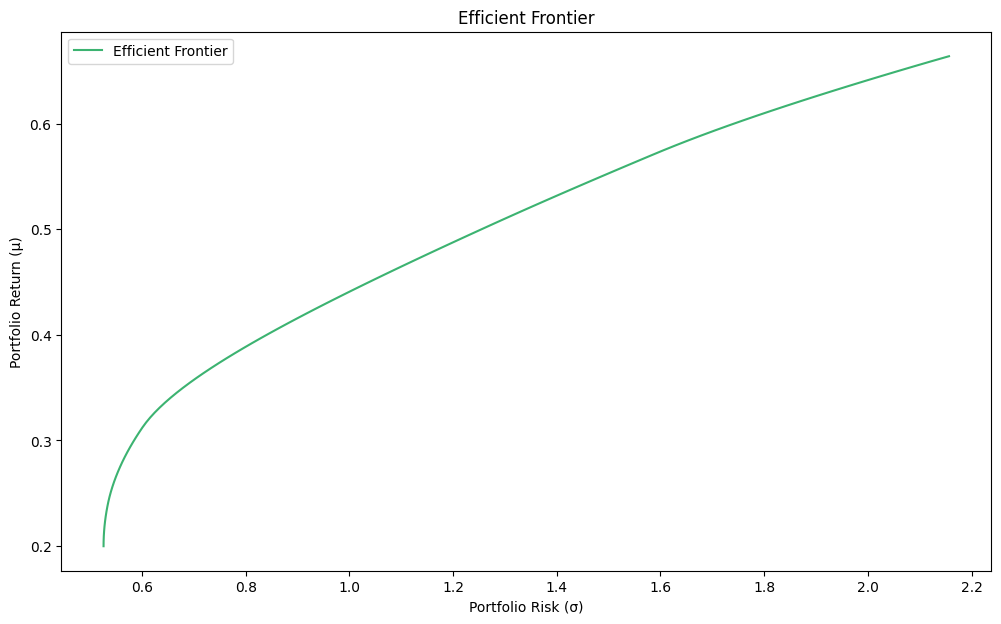

In [150]:
capm.plot(plot_efficient_frontier=True, plot_capital_market_line=False)

### Plotting the Capital Market Line

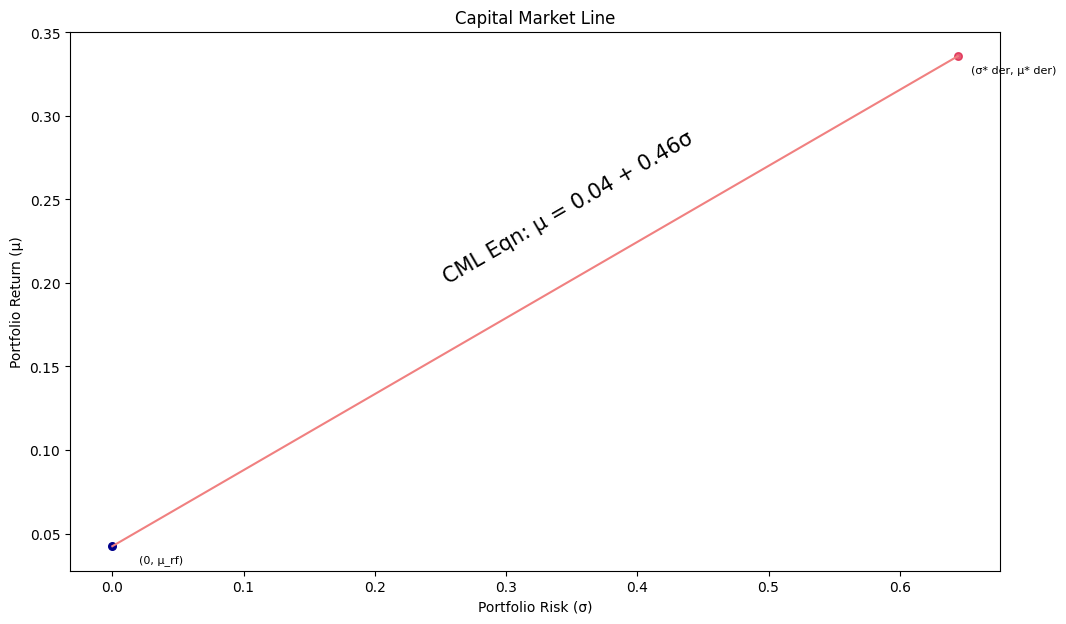

In [151]:
capm.plot(plot_efficient_frontier=False, plot_capital_market_line=True)

### Plotting Efficient Frontier and CML

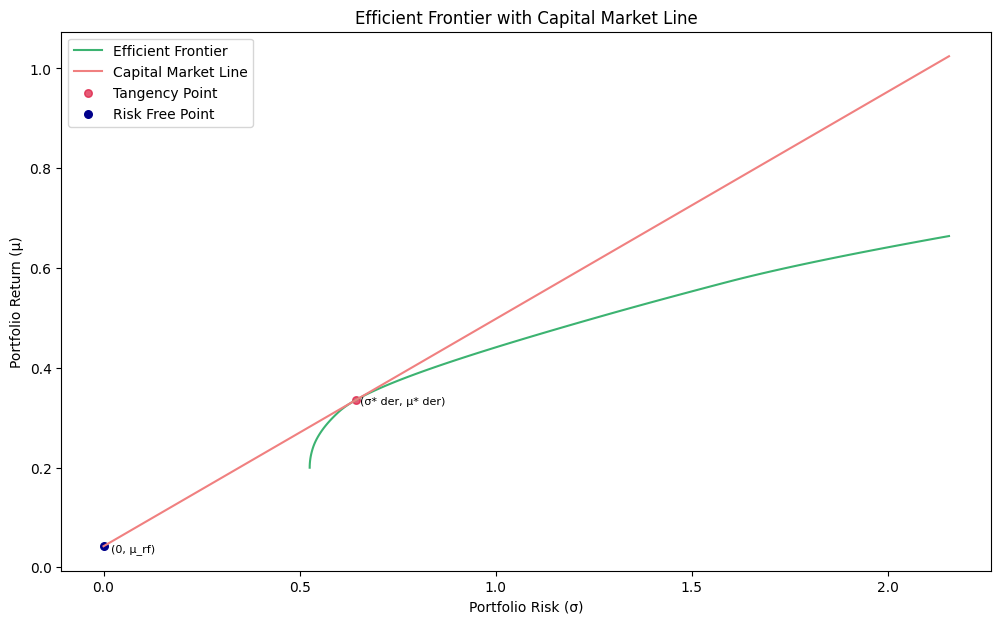

In [152]:
capm.plot(plot_efficient_frontier=True, plot_capital_market_line=True)

### Tangency Point

In [153]:
σ_der, μ_der = capm.tangency_point
print(f'({np.round(σ_der, 3)}, {np.round(μ_der, 3)})')

(0.644, 0.336)


---

---
# Individual **Security Market Line (SML)**

### SML Eq<sup>n</sup>: μ = μ<sub>rf</sub> + β * (μ<sub>m</sub> - μ<sub>rf</sub>)

In [154]:
def get_asset_beta(asset_return, market_return):
    σ_M = market_return.std()

    β = market_return.cov(asset_return) / (σ_M ** 2)
    return β

In [155]:
# 3 assets choosen are Microsoft, JPMorgan and Google
microsoft_returns = risky_asset_returns['Microsoft']
jp_morgan_returns = risky_asset_returns['JPMorgan']
google_returns = risky_asset_returns['Google']

In [156]:
expected_returns = risky_asset_returns.mean()

### Security Market Line

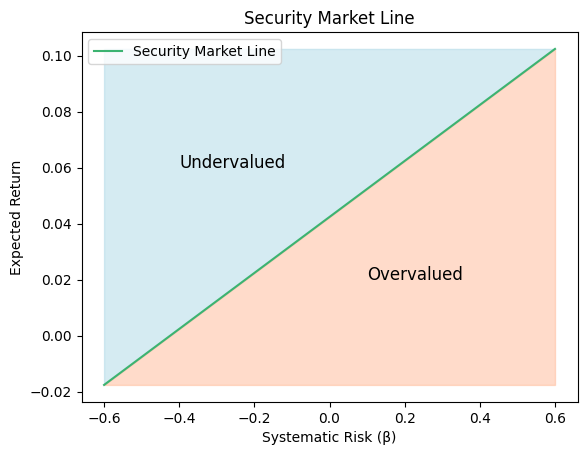

In [157]:
betas = np.linspace(-0.6, 0.6, 10)

# Security Market Line
μ_M = market_return.mean()
μ_rf = risk_free_rate
μ = μ_rf + betas * (μ_M - μ_rf)
sns.lineplot(x=betas, y=μ, color='mediumseagreen', label='Security Market Line', linewidth=1.5)
plt.text(-0.4, 0.06, 'Undervalued', fontsize=12)
plt.text(0.1, 0.02, 'Overvalued', fontsize=12)
plt.fill_between(betas, μ, max(μ), color='lightblue', alpha=0.5)
plt.fill_between(betas, min(μ), μ, color='#FFB996', alpha=0.5)

plt.xlabel('Systematic Risk (β)')
plt.ylabel('Expected Return')
plt.title('Security Market Line')
plt.show()

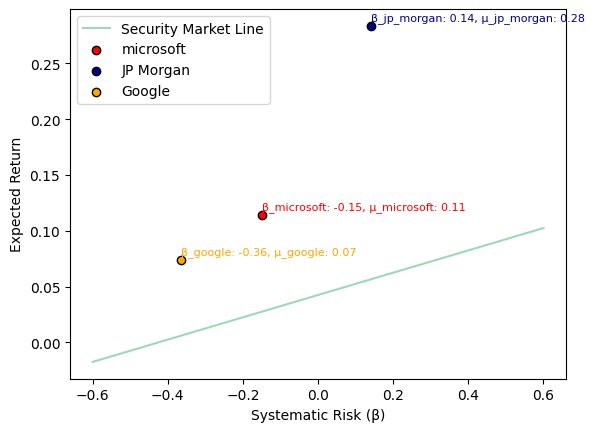

In [158]:
betas = np.linspace(-0.6, 0.6, 10)

# Security Market Line
μ_M = market_return.mean()
μ_rf = risk_free_rate
μ = μ_rf + betas * (μ_M - μ_rf)
sns.lineplot(x=betas, y=μ, color='mediumseagreen', label='Security Market Line', alpha=0.5)
plt.xlabel('Systematic Risk (β)')
plt.ylabel('Expected Return')

# For Microsoft
β_microsoft = get_asset_beta(microsoft_returns, market_return)
μ_microsoft = expected_returns['Microsoft']
plt.scatter(x=β_microsoft, y=μ_microsoft, color='red', label='microsoft', edgecolor='black')
plt.text(β_microsoft, μ_microsoft + 0.005, f'β_microsoft: {np.round(β_microsoft, 2)}, μ_microsoft: {np.round(μ_microsoft, 2)}', fontsize=8, color='red')

# For JP Morgan
β_jp_morgan = get_asset_beta(jp_morgan_returns, market_return)
μ_jp_morgan = expected_returns['JPMorgan']
plt.scatter(x=β_jp_morgan, y=μ_jp_morgan, color='darkblue', label='JP Morgan', edgecolor='black')
plt.text(β_jp_morgan, μ_jp_morgan + 0.005, f'β_jp_morgan: {np.round(β_jp_morgan, 2)}, μ_jp_morgan: {np.round(μ_jp_morgan, 2)}', fontsize=8, color='darkblue')

# For Google
β_google = get_asset_beta(google_returns, market_return)
μ_google = expected_returns['Google']
plt.scatter(x=β_google, y=μ_google, color='orange', label='Google', edgecolor='black')
plt.text(β_google, μ_google + 0.005, f'β_google: {np.round(β_google, 2)}, μ_google: {np.round(μ_google, 2)}', fontsize=8, color='orange')

plt.legend()
plt.show()

___

---
# **Sharpe Ratio** for Optimized Portfolio and Individual Assets

### For Optimized **Portfolio**

In [159]:
# Let user desires for a specific return 0.15

desired_return = 0.15
portfolio, portfolio_risk = capm.get_optimized_portfolio(desired_return)

sharpe_ratio = capm.get_sharpe_ratio(desired_return, portfolio_risk)
print(f'Optimized Portfolio: \n{portfolio}\n\n')
print('Sharpe Ratio: ', sharpe_ratio)

Optimized Portfolio: 
Microsoft      0.000
JPMorgan       0.176
Walmart        0.106
Salesforce     0.018
McDonald's     0.000
Amazon         0.000
NVIDIA         0.062
Caterpillar    0.004
CocaCola       0.000
Google         0.000
Risk Free      0.633
dtype: float64


Sharpe Ratio:  0.4553845331759067


### For **Individual** Assets

In [160]:
sharpe_ratios = []

for asset_name in risky_asset_returns.columns:
    asset_return = risky_asset_returns[asset_name]

    expected_return = asset_return.mean()
    asset_risk = asset_return.std()
    sharpe_ratio = (expected_return - risk_free_rate) / asset_risk

    sharpe_ratios.append(sharpe_ratio)

individual_sharpe_ratio = pd.Series(sharpe_ratios, index=risky_asset_returns.columns)

In [161]:
individual_sharpe_ratio

Microsoft      0.066834
JPMorgan       0.311536
Walmart        0.176869
Salesforce     0.209705
McDonald's     0.028528
Amazon         0.113065
NVIDIA         0.288253
Caterpillar    0.243791
CocaCola       0.034280
Google         0.018559
dtype: float64

___

---
# **Bonus**: Markowitz v/s Capital Asset Pricing Model

### For Markowitz

In [162]:
desired_return = 0.15
risk_markowitz = capm.get_min_risk_markowitz(desired_return)

In [163]:
print(risk_markowitz)

0.5390393748093267


### For CAPM

In [164]:
desired_return = 0.15
_, risk_capm = capm.get_optimized_portfolio(desired_return)

In [165]:
print(risk_capm)

0.2362838264391296


So, we get lesser risk for same expected return value in case of CAPM

---